# Investigate Data from The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Background Information
The dataset I've selected is from the TMDb and contains data on movies, their ratings, and other characteristics.

> I'd like to answer the following questions.
1. Which months and weeks are more/less popular for movie releases?
2. How have movie genres trended over time?
3. How to measure popularity for movies?

> The variables of interest are listed below.
- one dependent variable: **popularity**
- three independent variables: **vote_count, vote_average, release_year**

Because I've only done exploratory data analysis here, my work is limited to basic data wrangling and visualization. Therefore, my conclusions in this report are tentative at best. Further statistical inference will be needed to confirm my preliminary hypotheses.

### Resources
In addition to my Udacity lessions, I've also consulted external resources such as Stack Overflow and the Movie Database Developers API Documentation to debug my codes and to understand the data better.

In [1]:
# import all relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I check for data cleanliness after loading the csv file, and then trim and clean my dataset in preparation for further analysis. I have added some comments to document my steps and explain my decision-making process along the way.

### General Properties
- Number of rows: 10866
- Number of columns: 21
- Are there duplicated rows: Yes
- Are there null values: Yes
- Interesting columns:
    - popularity
    - genres
    - vote_count
    - vote_average
    - release_year
    - budget_adj

### Data Cleanliness

Overall, data is not too messy. There is one duplicate record and needs to be deleted. Null values are present in a number of columns; however, a close examination reveals that some columns are not important for this analysis and should be dropped before removing null values.

In [2]:
# load data from csv and print out the first few lines
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# inspect data types and look for missing or possibly errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Duplicates

Only one duplicate row is found.

In [4]:
# check for duplicates
sum(df.duplicated())

1

In [5]:
# find the duplicated row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Null Values

I don't believe that having null values across nine columns renders the majority of this dataset unfit for exploratory data analysis. These seven columns, 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', and 'production_companies', consist of strings, so advanved data analysis techniques beyond the scope of this term must be deployed to deal with string vlaues. In this project, I will focus on integer and floating numbers.

In [6]:
# check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

Below, I remove the one duplicate row as well as 10 rows of null values in the 'imdb_id' column and 23 rows of null values in the 'genres' column.

In [7]:
# drop the duplicated row
df.drop_duplicates(inplace=True)
df = df.reset_index()

In [8]:
# drop the columns that will not be investigated in this report
df = df.drop(['index', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1)

# drop the rows with duplicates
df.dropna(inplace=True)

# confirm that operations are done properly and expect a return of False
df.isnull().sum().any()

False

In [9]:
# take a look at the cleaned dataset before moving on to the next section
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which quarters are more/less popular for movie releases?

As movie trends tend to change over time, I think it is most relevant to look at data from the past 10 years only. Seasonal trends in movie releases have been widely reported by the media. I will take this opportunity to observe what types of trends exist in movie releases. To begin, I use the 'release_date' column to create a new column named 'release_quarter'.

In [10]:
# only interested in the past 10 years
df = df.query('release_year >= 2006')
pd.options.mode.chained_assignment = None # bypass the warning message

# create a new column to allow aggregating data by quarters
df.release_date = pd.to_datetime(df.release_date)
df['release_quarter'] = df.release_date.apply(lambda x: x.quarter)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_quarter
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,4
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2


Upon further consideration, there is a good number of "knock-off" movies produced every year. In order to minimize the potentially distorting impact of these outliers, I will limit my analysis to movies with average ratings above the mean. In other words, I will exclude roughly half of the movies whose average ratings fall below the mean.

In [11]:
df_top = df.query('vote_average > vote_average.mean()')
# number of movies by quarters
df_top.groupby('release_quarter').count()['id']

release_quarter
1    601
2    580
3    822
4    725
Name: id, dtype: int64

In [12]:
# total adjusted revenues by quarters
df_top.groupby(['release_quarter']).sum()['revenue_adj']

release_quarter
1    2.311874e+10
2    5.690195e+10
3    3.420598e+10
4    4.846137e+10
Name: revenue_adj, dtype: float64

In [13]:
# total vote counts by quarters
df_top.groupby(['release_quarter']).sum()['vote_count']

release_quarter
1    180376
2    317779
3    292442
4    316621
Name: vote_count, dtype: int64

In this section, I've looked at three aspects of movie releases each suggesting a somewhat different trend. According to the number of movies released by quarters, I can conclude that Q3 and Q4 are popular times to release new movies. My guess would be that because movie awards usually have a cutoff date at the end of the year, more movies are released before this deadline to be considered for such awards. Further investigation into the cause is beyond the scope of this project and requires data not included in this dataset.

The total adjusted revenues broken down by quarters suggest that Q2 is the most popular time for movie releases. This statistical summary makes economic sense since blockbusters coming out in May and June usually stay on the big screen for two to three months over the summer time when moviegoers visit theaters most frequently.

Lastly, the total vote counts by quarters suggest that movie fans are the least active in Q1 and the most active in Q2 and Q4. This is in line with my previous two observations. Movie lovers tend to vote in the summer for blockbusters generating large revenues and in the winter for films competing for the academy award and other special honors.

### Research Question 2: How have movie genres trended over time?

In this section, I will examine whether and how movie genres have changed in popularity in the past 10 years. I will focus on particular four genres: animation, documentary, science fiction, and war. Below, I will compute the number of movies produced in each mentioned genre every year and its percentage of the total number of movies made.

In [14]:
# focus on only 4 genres only 
genre_list = ['animation', 'documentary', 'science fiction', 'war']

# create 4 new columns to count the number of movies in each genre
for g in genre_list:
    df[g] = df.genres.apply(lambda x: g in x.lower())
df.rename(columns={'science fiction': 'science_fiction'}, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_quarter,animation,documentary,science_fiction,war
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2,False,False,True,False
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2,False,False,True,False
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1,False,False,True,False
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,4,False,False,True,False
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2,False,False,False,False


In [15]:
# number of movies for each genre in the same release year
df_genres = df.groupby('release_year').sum()
df_genres = df_genres[df_genres.columns[-len(genre_list):]]
df_genres['num_movies'] = df.groupby('release_year').count()['id']
df_genres

,animation,documentary,science_fiction,war,num_movies
release_year,,,,,
2006,39.0,16.0,30.0,7.0,408
2007,32.0,19.0,40.0,6.0,436
2008,33.0,26.0,52.0,18.0,495
2009,46.0,25.0,69.0,12.0,529
2010,50.0,35.0,45.0,7.0,486
2011,46.0,49.0,56.0,9.0,540
2012,40.0,49.0,54.0,10.0,583
2013,42.0,62.0,60.0,7.0,655
2014,36.0,73.0,62.0,23.0,699


In [16]:
# each genre as a percentage of the total number of movies in the same release year
df_genres = df_genres.div(df_genres.num_movies, axis=0)
df_genres *= 100
df_genres

,animation,documentary,science_fiction,war,num_movies
release_year,,,,,
2006,9.558824,3.921569,7.352941,1.715686,100.0
2007,7.339450,4.357798,9.174312,1.376147,100.0
2008,6.666667,5.252525,10.505051,3.636364,100.0
2009,8.695652,4.725898,13.043478,2.268431,100.0
2010,10.288066,7.201646,9.259259,1.440329,100.0
2011,8.518519,9.074074,10.370370,1.666667,100.0
2012,6.861063,8.404803,9.262436,1.715266,100.0
2013,6.412214,9.465649,9.160305,1.068702,100.0
2014,5.150215,10.443491,8.869814,3.290415,100.0


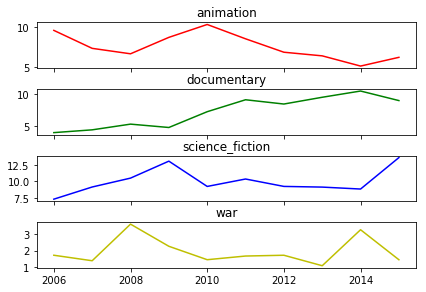

In [17]:
# create 4 subplots to visualize genre trends over 10 years
fig, ax = plt.subplots(4, sharex=True)
fig.tight_layout() # optimize subplot space management

# some quick fixes to allow generating 4 subplots in a for loop
genre_list[2] = 'science_fiction'
colors = ['r', 'g', 'b', 'y']
dict_genre_color = dict(zip(genre_list, colors))
i = 0

# 4 subplots with different titles but sharing the same x-axis
for g in genre_list:
    ax[i].plot(df_genres.index, df_genres[g], color=dict_genre_color[g])
    ax[i].set_title(g)
    i += 1

Judging from the above tables and graphs, I can form the following conclusions. Roughly the same number of animation movies are made every year; however, because more movies are produced now than 10 years ago, animation as a percentage of total movies has trended down. Documentary has become a more popular movie genre, and this is very consistent over time. Science fiction is another genre gaining more popularity, but its trend is less consistent than that of documentary. Other than three years, 2008, 2009, and 2014, a similar number of war movies is released each year. The trend here is less obvious.

### Research Question 3: How to measure popularity for movies??

As stated in the developers API documentation, The Movie Database uses popularity as a key metric for its recommendation model to improve search results. In this particular case, popularity for movies is based on a number of factors including the number of total votes, release date, and the number of users marking the movie as a favorite and adding it to their watchlist.

From this information, I'd like to confirm that 'popularity' is correlated with 'vote_count' and 'release_year'. In other words, I'd like to explore 'popularity' as a dependent variable and 'vote_count' and 'release_year' as independent variables. I'd also like to analyze whether a similar relationship exists between 'popularity' and 'budget_adj'.

Text(0.5,1,'Popularity vs Vote Count')

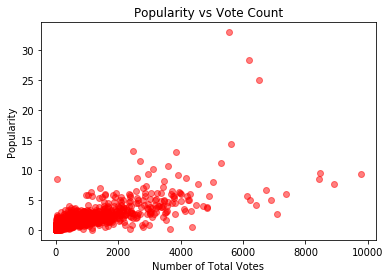

In [18]:
x = df.vote_count
y = df.popularity
plt.scatter(x, y, c='r', alpha=0.5)
plt.xlabel('Number of Total Votes')
plt.ylabel('Popularity')
plt.title('Popularity vs Vote Count')

Text(0.5,1,'Popularity vs Adjusted Budget')

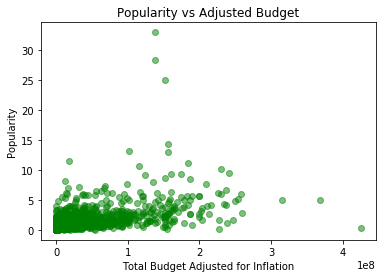

In [19]:
x = df_top.budget_adj
y = df_top.popularity
plt.scatter(x, y, c='g', alpha=0.5)
plt.xlabel('Total Budget Adjusted for Inflation')
plt.ylabel('Popularity')
plt.title('Popularity vs Adjusted Budget')

Text(0.5,1,'Popularity vs Release Year')

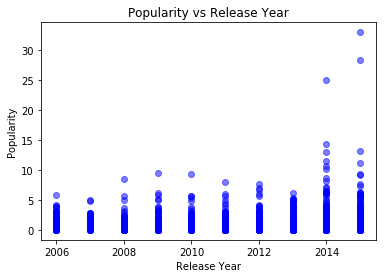

In [20]:
x = df_top.release_year
y = df_top.popularity
plt.scatter(x, y, c='b', alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Popularity vs Release Year')

Having created scatter plots for three pairs of variables, I can confirm visually that some statistical relationships exist between my dependent variables and the independent variable. Overlooking outliers, I can see a positive correlation between 'popularity' and 'vote_count' as well as between 'popularity' and 'budget_adj'. It is straightforward that if a movie receives more votes from users, it is gaining popularity. Similarly, if a movie has a larger budget, it will spend more on marketing and more users will react by looking up the movie on TMBd.

Lastly, it is quite clear from the last graph that movies released in the last two years, 2014 and 2015, are more popular than those made earlier. This is reasonable because users tend to get swayed by movie critics and commercials, both online and in other media outlets, and this effect is mostly limited to recent films. On ther other hand, this also reveals the limitation of building a popularity-based recommendation engine. Some movies from 5 or 10 years ago might be a great fit for a particular user, but it scores a low popularity and is, therefor, excluded from the recommendation results. An extension of this project would be to investigate string values in the columns removed in the data wrangling section. They provide descriptions for movies and can support a content-based recommendation system. 

<a id='conclusions'></a>
## Conclusions

From my earlier analysis, I've found that both Q2 and Q4 are popular times to release movies.

In terms of trends in movie genres, I've learned that documentary and science fiction have gained popularity in the past 10 years while production in animation and war movies has stayed rather flat.

I've also reached the conclusion that the number of total vote counts, the total revenues adjusted for inflation, and release year all have a direct relationship with popularity. More data and further investigation are needed to understand the nature of these correlations. I believe I will be able to do so after completing the second term of the Udacity Data Analyst Nano-degree.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0